In [29]:
#Se importan las librerías
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, legend, title, savefig
from matplotlib.font_manager import FontProperties
from matplotlib import pylab
from scipy.optimize import curve_fit
import random

In [30]:
#Se declara el arreglo de los números aleatorios de las probabilidades acumuladas
r = []

#Se declara el arreglo de los valores de x dentro del rango
x = []

#Se llena el arreglo de x (N = 40), por medio de la función inversa de la función de distribución, siendo esta exponencial y de k = 4 
k = 4.0
N = 40
for i in range(0, N):
    a = np.random.random()
    r.append(a)
    b = (-1.0/k)*np.log(1-r[i])
    x.append(b)

In [31]:
#Se declara un DataFrame con estos datos
#Se hacen las listas
datos = list(zip(r, x))

#Se hace un DataFrame con los datos obtenidos
df0 = pd.DataFrame(datos, columns = [r'Probabilidad acumulada ($r_i$)', r'Valor del rango ($x_i$)'])
df0

,Probabilidad acumulada ($r_i$),Valor del rango ($x_i$)
0,0.372556,0.116525
1,0.789413,0.389464
2,0.464559,0.156166
3,0.128518,0.034390
4,0.738235,0.335077
5,0.145446,0.039294
6,0.539590,0.193910
7,0.575701,0.214329
8,0.496256,0.171422
9,0.575291,0.214088


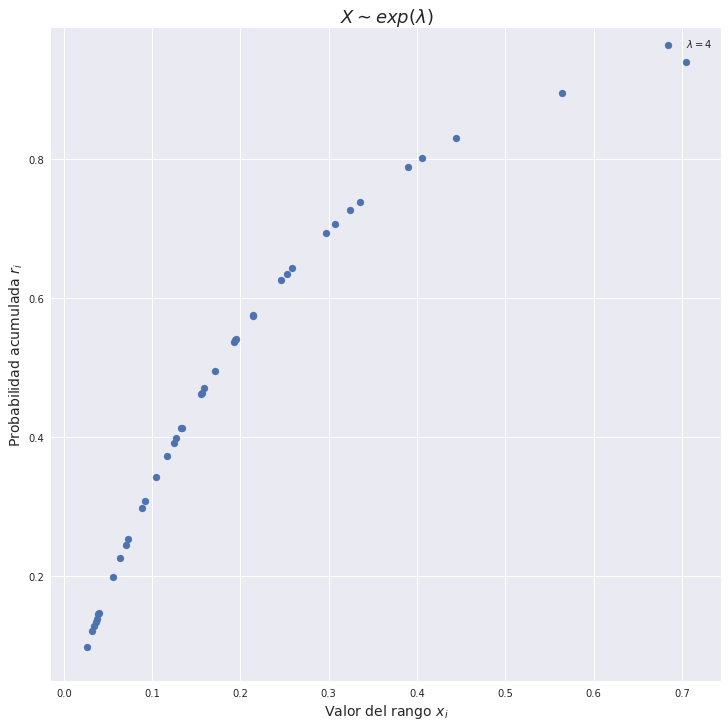

In [32]:
#Se grafica

#Graficando la función de distribución

#Comando para darle una estética distinta a las gráficas.
sns.set(rc={'figure.figsize':(12,12)})
figure(1, figsize=(12, 12))


plt.scatter(x, r, label = r'$\lambda = 4$')
plt.legend()
plt.xlabel(r'Valor del rango $x_i$', fontsize = 14)
plt.ylabel(r'Probabilidad acumulada $r_i$', fontsize = 14)
title(r'$X \sim exp(\lambda)$', fontsize = 18)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('TareaEst.png', dpi=300)

In [33]:
#Obteniendo el rango
R = np.amax(x)-np.amin(x)

#Consiguiendo el número de intervalos
k = int(np.sqrt(N))

#Calculando el ancho del intervalo
w = R/k

#Declarando un arreglo para los límites inferiores y superiores
Lim = []

#Llenando los límites
for i in range(0, k+1):
    c = np.amin(x) + (w*i)
    Lim.append(c)
    
#Declarando el arreglo de los números de veces que un valor se encuentra en los intervalos
n_A = []

#LLenando el arreglo con un contador
d = e = f = g = h = j = 0
for i in range(0, N):
    if x[i]>=Lim[0] and x[i]<Lim[1]:
        d = d + 1
    elif x[i]>=Lim[1] and x[i]<Lim[2]:
        e = e + 1
    elif x[i]>=Lim[2] and x[i]<Lim[3]:
        f = f + 1
    elif x[i]>=Lim[3] and x[i]<Lim[4]:
        g = g + 1
    elif x[i]>=Lim[4] and x[i]<Lim[5]:
        h = h + 1
    elif x[i]>=Lim[5] and x[i]<=Lim[6]:
        j = j + 1
n_A.append(d)
n_A.append(e)
n_A.append(f)
n_A.append(g)
n_A.append(h)
n_A.append(j)

#Declarando el arreglo de las frecuencias
f_A = []

#Obteniendo las frecuencias
for i in range(0, k):
    l = n_A[i]/N
    f_A.append(l)

In [34]:
#Se declara un DataFrame con estos datos
#Se hacen las listas
data = list(zip(n_A, f_A))

#Se hace un DataFrame con los datos obtenidos
df1 = pd.DataFrame(data, columns = [r'Número de veces que aparece en el intervalo ($n_A$)', r'Frecuencia relativa ($f_A$)'])
df1

,Número de veces que aparece en el intervalo ($n_A$),Frecuencia relativa ($f_A$)
0,19,0.475
1,10,0.250
2,6,0.150
3,3,0.075
4,1,0.025
5,1,0.025


In [35]:
#Declarando un arrreglo de contador
count = []
for i in range(0, k):
    a = i
    count.append(a)

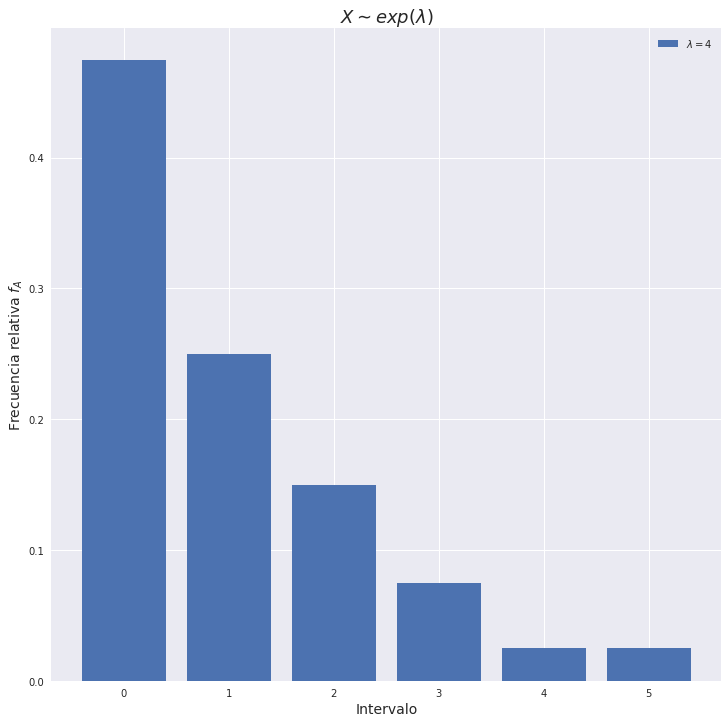

In [36]:
#Se grafica

#Graficando la función de distribución

#Comando para darle una estética distinta a las gráficas.
sns.set(rc={'figure.figsize':(12,12)})
figure(1, figsize=(12, 12))


plt.bar(count, f_A, label = r'$\lambda = 4$')
plt.legend()
plt.xlabel(r'Intervalo', fontsize = 14)
plt.ylabel(r'Frecuencia relativa $f_A$', fontsize = 14)
title(r'$X \sim exp(\lambda)$', fontsize = 18)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('TareaEst2.png', dpi=300)